# Mandatory Assignment 1


## Tax Revenues and Municipal Tax Rates in Denmark
By: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1: Descriptive analysis


In [37]:
import pandas as pd

df = pd.read_stata('A1_kommune.dta')
df['const'] = 1
print(df.shape)
print(df.columns)
vars=['taxrev', 'taxrate', 'pop']
df.describe()


(98, 6)
Index(['nr', 'kommune', 'taxrev', 'taxrate', 'pop', 'const'], dtype='object')


,nr,taxrev,taxrate,pop,const
count,98.000000,98.000000,98.000000,98.000000,98.0
mean,462.173469,4477.341309,25.208162,56475.887755,1.0
std,236.555437,5251.175293,0.908003,62925.301713,0.0
min,101.000000,211.228409,22.799999,1969.000000,1.0
25%,242.500000,2466.702271,24.799999,29997.750000,1.0
50%,435.000000,3317.848633,25.299999,43475.000000,1.0
75%,697.250000,4786.060913,25.700001,59733.000000,1.0
max,860.000000,44170.335938,27.799999,528208.000000,1.0


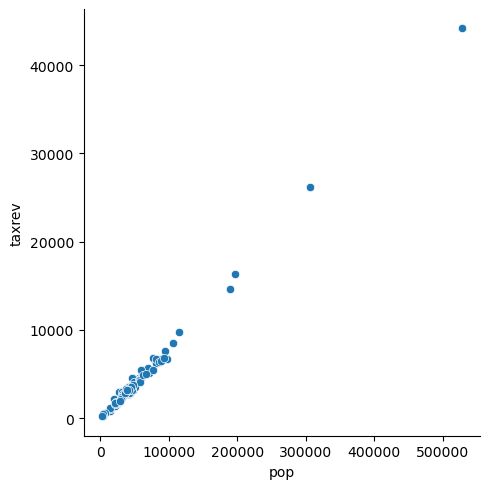

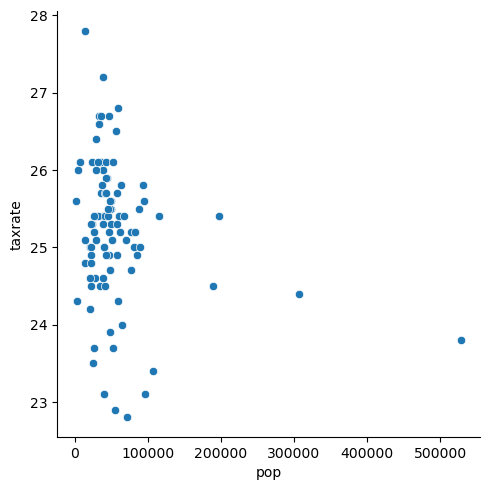

In [38]:
import seaborn as sns
sns.relplot(x='pop', y='taxrev', data=df)
sns.relplot(x='pop', y='taxrate', data=df)

In [54]:
#df['taxPerPerson'] = df.taxrev/df.pop


### Problem 2: Empirical analysis of tax revenues and municipal tax rates

In [44]:
#2.3
import statsmodels.api as sm
import numpy as np

y = np.log(df['taxrev'])
model_tc = sm.OLS(y, df[['taxrate','const']]).fit()
print(model_tc.summary())

                            OLS Regression Results                            
Dep. Variable:                 taxrev   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.818
Date:                Mon, 16 Sep 2024   Prob (F-statistic):             0.0965
Time:                        09:42:21   Log-Likelihood:                -111.12
No. Observations:                  98   AIC:                             226.2
Df Residuals:                      96   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
taxrate       -0.1426      0.085     -1.679      0.0

In [53]:
#2.5
df['logpop'] = np.log(df['pop'])
model_tcl = sm.OLS(y, df[['taxrate','const','logpop']]).fit()
print(model_tcl.summary())

                            OLS Regression Results                            
Dep. Variable:                 taxrev   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2344.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.42e-81
Time:                        10:10:24   Log-Likelihood:                 79.497
No. Observations:                  98   AIC:                            -153.0
Df Residuals:                      95   BIC:                            -145.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
taxrate        0.0226      0.012      1.816      0.0

### Problem 3: Multiple linear regression as two simple linear regressions

In [73]:
#3.3
model_tp = sm.OLS(df['taxrate'], df[['logpop','const']]).fit()
df['res1'] = model_tp.resid
#print(model_tp.summary())

df['logrev'] = y
model_tr = sm.OLS(df['logrev'], df[['res1','const']]).fit()
print(model_tr.summary())

                            OLS Regression Results                            
Dep. Variable:                 logrev   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06626
Date:                Mon, 16 Sep 2024   Prob (F-statistic):              0.797
Time:                        10:49:24   Log-Likelihood:                -112.50
No. Observations:                  98   AIC:                             229.0
Df Residuals:                      96   BIC:                             234.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
res1           0.0226      0.088      0.257      0.7

### Problem 4: Conclusion

In [32]:
#To do